In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('madfhantr.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])
df['Dependents']=le.fit_transform(df['Dependents'])

In [21]:
df['Dependents'].fillna(df['Dependents'].mode().iloc[0],inplace=True)
df['Gender'].fillna(df['Gender'].mode().iloc[0],inplace=True)
df['Married'].fillna(df['Married'].mode().iloc[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode().iloc[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode().iloc[0],inplace=True)


df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Geneder              0
dtype: int64

In [22]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Geneder
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,1
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1,0
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1,1


In [24]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()

x=df.drop('Loan_ID',axis=1)
x=x.drop('Geneder',axis=1)
x=x.drop('Loan_Status',axis=1)

x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [25]:
y=df['Loan_Status']

In [27]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

In [28]:
dc.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
y_pred=dc.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.7337662337662337


In [34]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


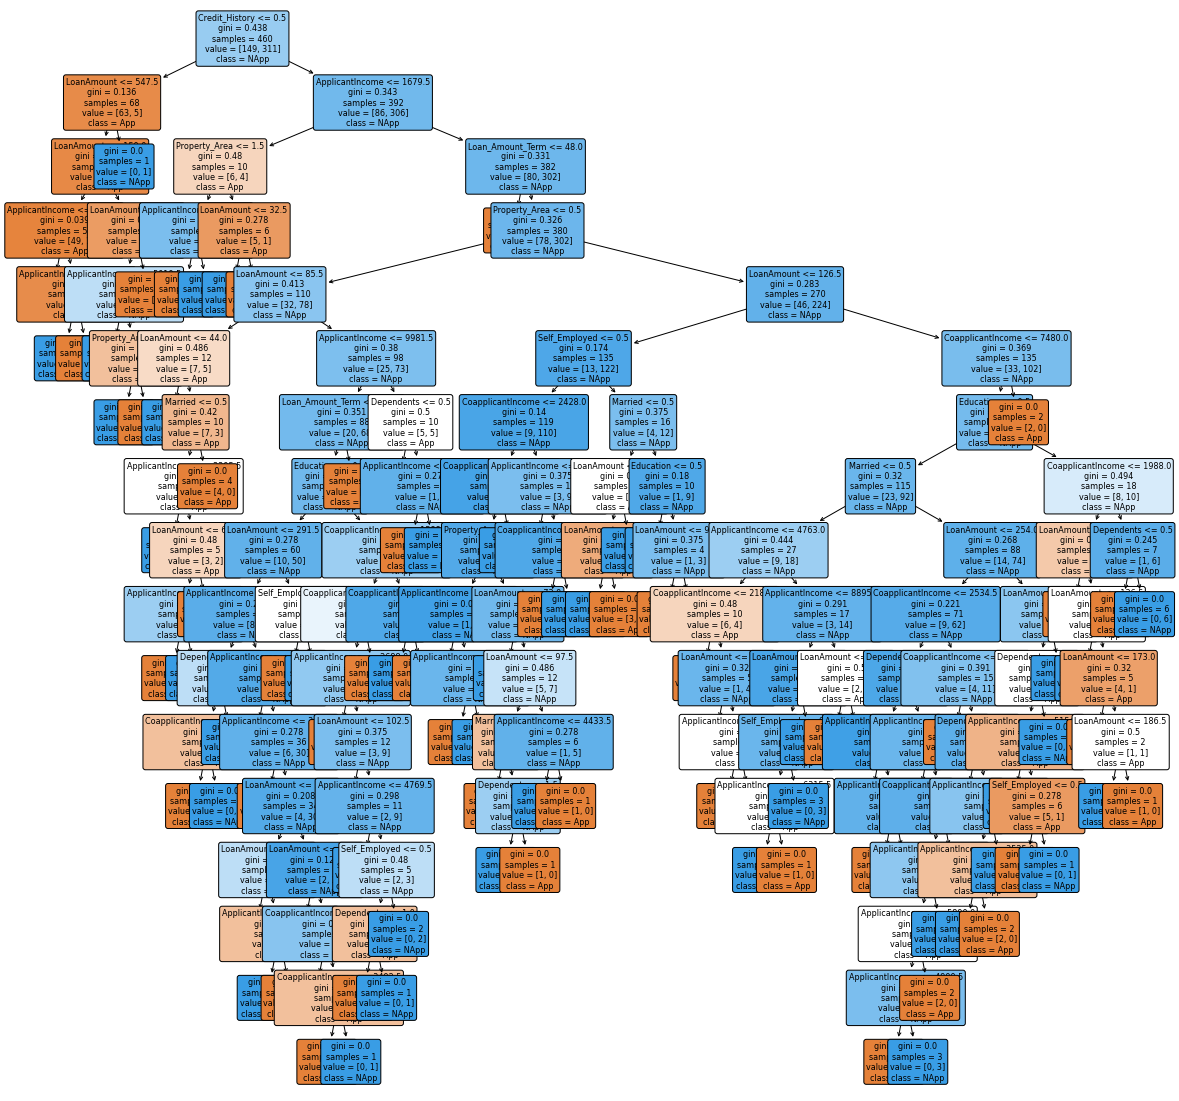

In [36]:
plt.figure(figsize=(20,20))
plot_tree(dc,fontsize=8,filled=True,rounded=True,feature_names=x.columns,class_names=['App','NApp']);